In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as pylt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving cause_of_deaths dataset.csv to cause_of_deaths dataset.csv


In [62]:
data = pd.read_csv('cause_of_deaths dataset.csv')
data.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


 this data set having a column named as year which is actually seems to be as int type but its behaviour is like catogorical because its actually a range each country's 30 year data is given here so the year number is actually a catogory 

since their is no target column here this dataset commes under unsuperwised meachine learning 


This data set is having a column named as country, code and year these column are unnessery because from country name or code we have keep one, each country code is repeated 30 times because this each country's data is given on the year bases which starts from 1990 and ends on 2019 which is 30 years period of time 

Here each column related to some disease or some accident which give number of death in each country and that to of 39 years 

We can combine 30 years in to one single row but this will creat problem that the whole data set will get shrink to the size of 204 rows and nearly 32 column , 204 because that are number of country in this data set 

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [64]:
data.describe()

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,...,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000
mean,2004.500000,1719.701307,4864.189379,1173.169118,2253.600000,4140.960131,1683.333170,2083.797222,1262.589216,5941.898529,...,5138.704575,4724.132680,425.013399,1965.994281,5930.795588,1.709237e+04,6124.072059,10725.267157,588.711438,618.429902
std,8.656149,6672.006930,18220.659072,4616.156238,10483.633601,18427.753137,8877.018366,6917.006075,6057.973183,21011.962487,...,16773.081040,16470.429969,2022.640521,8255.999063,24097.784291,1.051572e+05,20688.118580,37228.051096,2128.595120,4186.023497
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,15.000000,90.000000,27.000000,9.000000,0.000000,34.000000,40.000000,5.000000,11.000000,...,236.000000,145.750000,6.000000,5.000000,174.750000,2.890000e+02,154.000000,284.000000,17.000000,2.000000
50%,2004.500000,109.000000,666.500000,164.000000,119.000000,0.000000,177.000000,265.000000,54.000000,136.000000,...,1087.000000,822.000000,52.500000,92.000000,966.500000,1.689000e+03,1210.000000,2185.000000,126.000000,15.000000
75%,2012.000000,847.250000,2456.250000,609.250000,1167.250000,393.000000,698.000000,877.000000,734.000000,1879.000000,...,2954.000000,2922.500000,254.000000,1042.500000,3435.250000,5.249750e+03,3547.250000,6080.000000,450.000000,160.000000
max,2019.000000,98358.000000,320715.000000,76990.000000,268223.000000,280604.000000,153773.000000,69640.000000,107929.000000,305491.000000,...,273089.000000,222922.000000,30883.000000,202241.000000,329237.000000,1.366039e+06,270037.000000,464914.000000,25876.000000,64305.000000


By looking at the mean and standard diviation value its seems that each column is having out liers and skewness 

In [65]:
a=data.Code.nunique()
a

204

In [66]:
b=data.Year.nunique()
b

30

Now we convert the country code in to bianary value

In [67]:
from sklearn.preprocessing import LabelEncoder

we can convert the country code to numbers or some binary value

In [68]:
lab_enc = LabelEncoder()

In [69]:
df = lab_enc.fit_transform(data['Code'])
pd.Series(df)

0         0
1         0
2         0
3         0
4         0
       ... 
6115    203
6116    203
6117    203
6118    203
6119    203
Length: 6120, dtype: int64

In [21]:
!pip install Category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 535 kB/s 


we are converting the code to binary value this will not add much column in our data set 

In [70]:
from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols =['Code'])
# transforming the column after fitting
newdata = encoder.fit_transform(data['Code'])
# concatenating dataframe
df = pd.concat([data, newdata], axis = 1)
# dropping old column
df = df.drop(['Code'], axis = 1)
df = df.drop(['Country/Territory'],axis = 1)
df.head(10)


,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,"Fire, Heat, and Hot Substances",Acute Hepatitis,Code_0,Code_1,Code_2,Code_3,Code_4,Code_5,Code_6,Code_7
0,1990,2159,1116,371,2087,93,1370,1538,2655,34,...,323,2985,0,0,0,0,0,0,0,1
1,1991,2218,1136,374,2153,189,1391,2001,2885,41,...,332,3092,0,0,0,0,0,0,0,1
2,1992,2475,1162,378,2441,239,1514,2299,3315,48,...,360,3325,0,0,0,0,0,0,0,1
3,1993,2812,1187,384,2837,108,1687,2589,3671,56,...,396,3601,0,0,0,0,0,0,0,1
4,1994,3027,1211,391,3081,211,1809,2849,3863,63,...,420,3816,0,0,0,0,0,0,0,1
5,1995,3102,1225,394,3131,175,1881,2969,4035,71,...,434,3946,0,0,0,0,0,0,0,1
6,1996,3193,1239,398,3175,175,1969,3331,4203,78,...,450,4098,0,0,0,0,0,0,0,1
7,1997,3304,1253,402,3250,240,2078,3028,4351,84,...,469,4252,0,0,0,0,0,0,0,1
8,1998,3281,1267,405,3193,563,2098,3098,4397,89,...,472,4310,0,0,0,0,0,0,0,1
9,1999,3200,1281,409,3115,468,2084,2917,4327,93,...,470,4332,0,0,0,0,0,0,0,1


In [71]:
x = pd.DataFrame(df.drop(['Year','Code_0','Code_1','Code_2','Code_3','Code_4','Code_5','Code_6','Code_7'],axis = 1))

In [72]:
x.head(10)

,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,2159,1116,371,2087,93,1370,1538,2655,34,93,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,2218,1136,374,2153,189,1391,2001,2885,41,102,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,2475,1162,378,2441,239,1514,2299,3315,48,118,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,2812,1187,384,2837,108,1687,2589,3671,56,132,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,3027,1211,391,3081,211,1809,2849,3863,63,142,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816
5,3102,1225,394,3131,175,1881,2969,4035,71,151,...,2248,3974,467,3087,6211,6823,3076,5843,434,3946
6,3193,1239,398,3175,175,1969,3331,4203,78,159,...,2298,4041,485,3130,6446,7000,3133,5966,450,4098
7,3304,1253,402,3250,240,2078,3028,4351,84,168,...,2347,4094,504,3203,6677,7168,3200,6096,469,4252
8,3281,1267,405,3193,563,2098,3098,4397,89,173,...,2388,4120,505,3145,6683,7287,3231,6154,472,4310
9,3200,1281,409,3115,468,2084,2917,4327,93,178,...,2437,4150,502,3068,6603,7400,3247,6182,470,4332


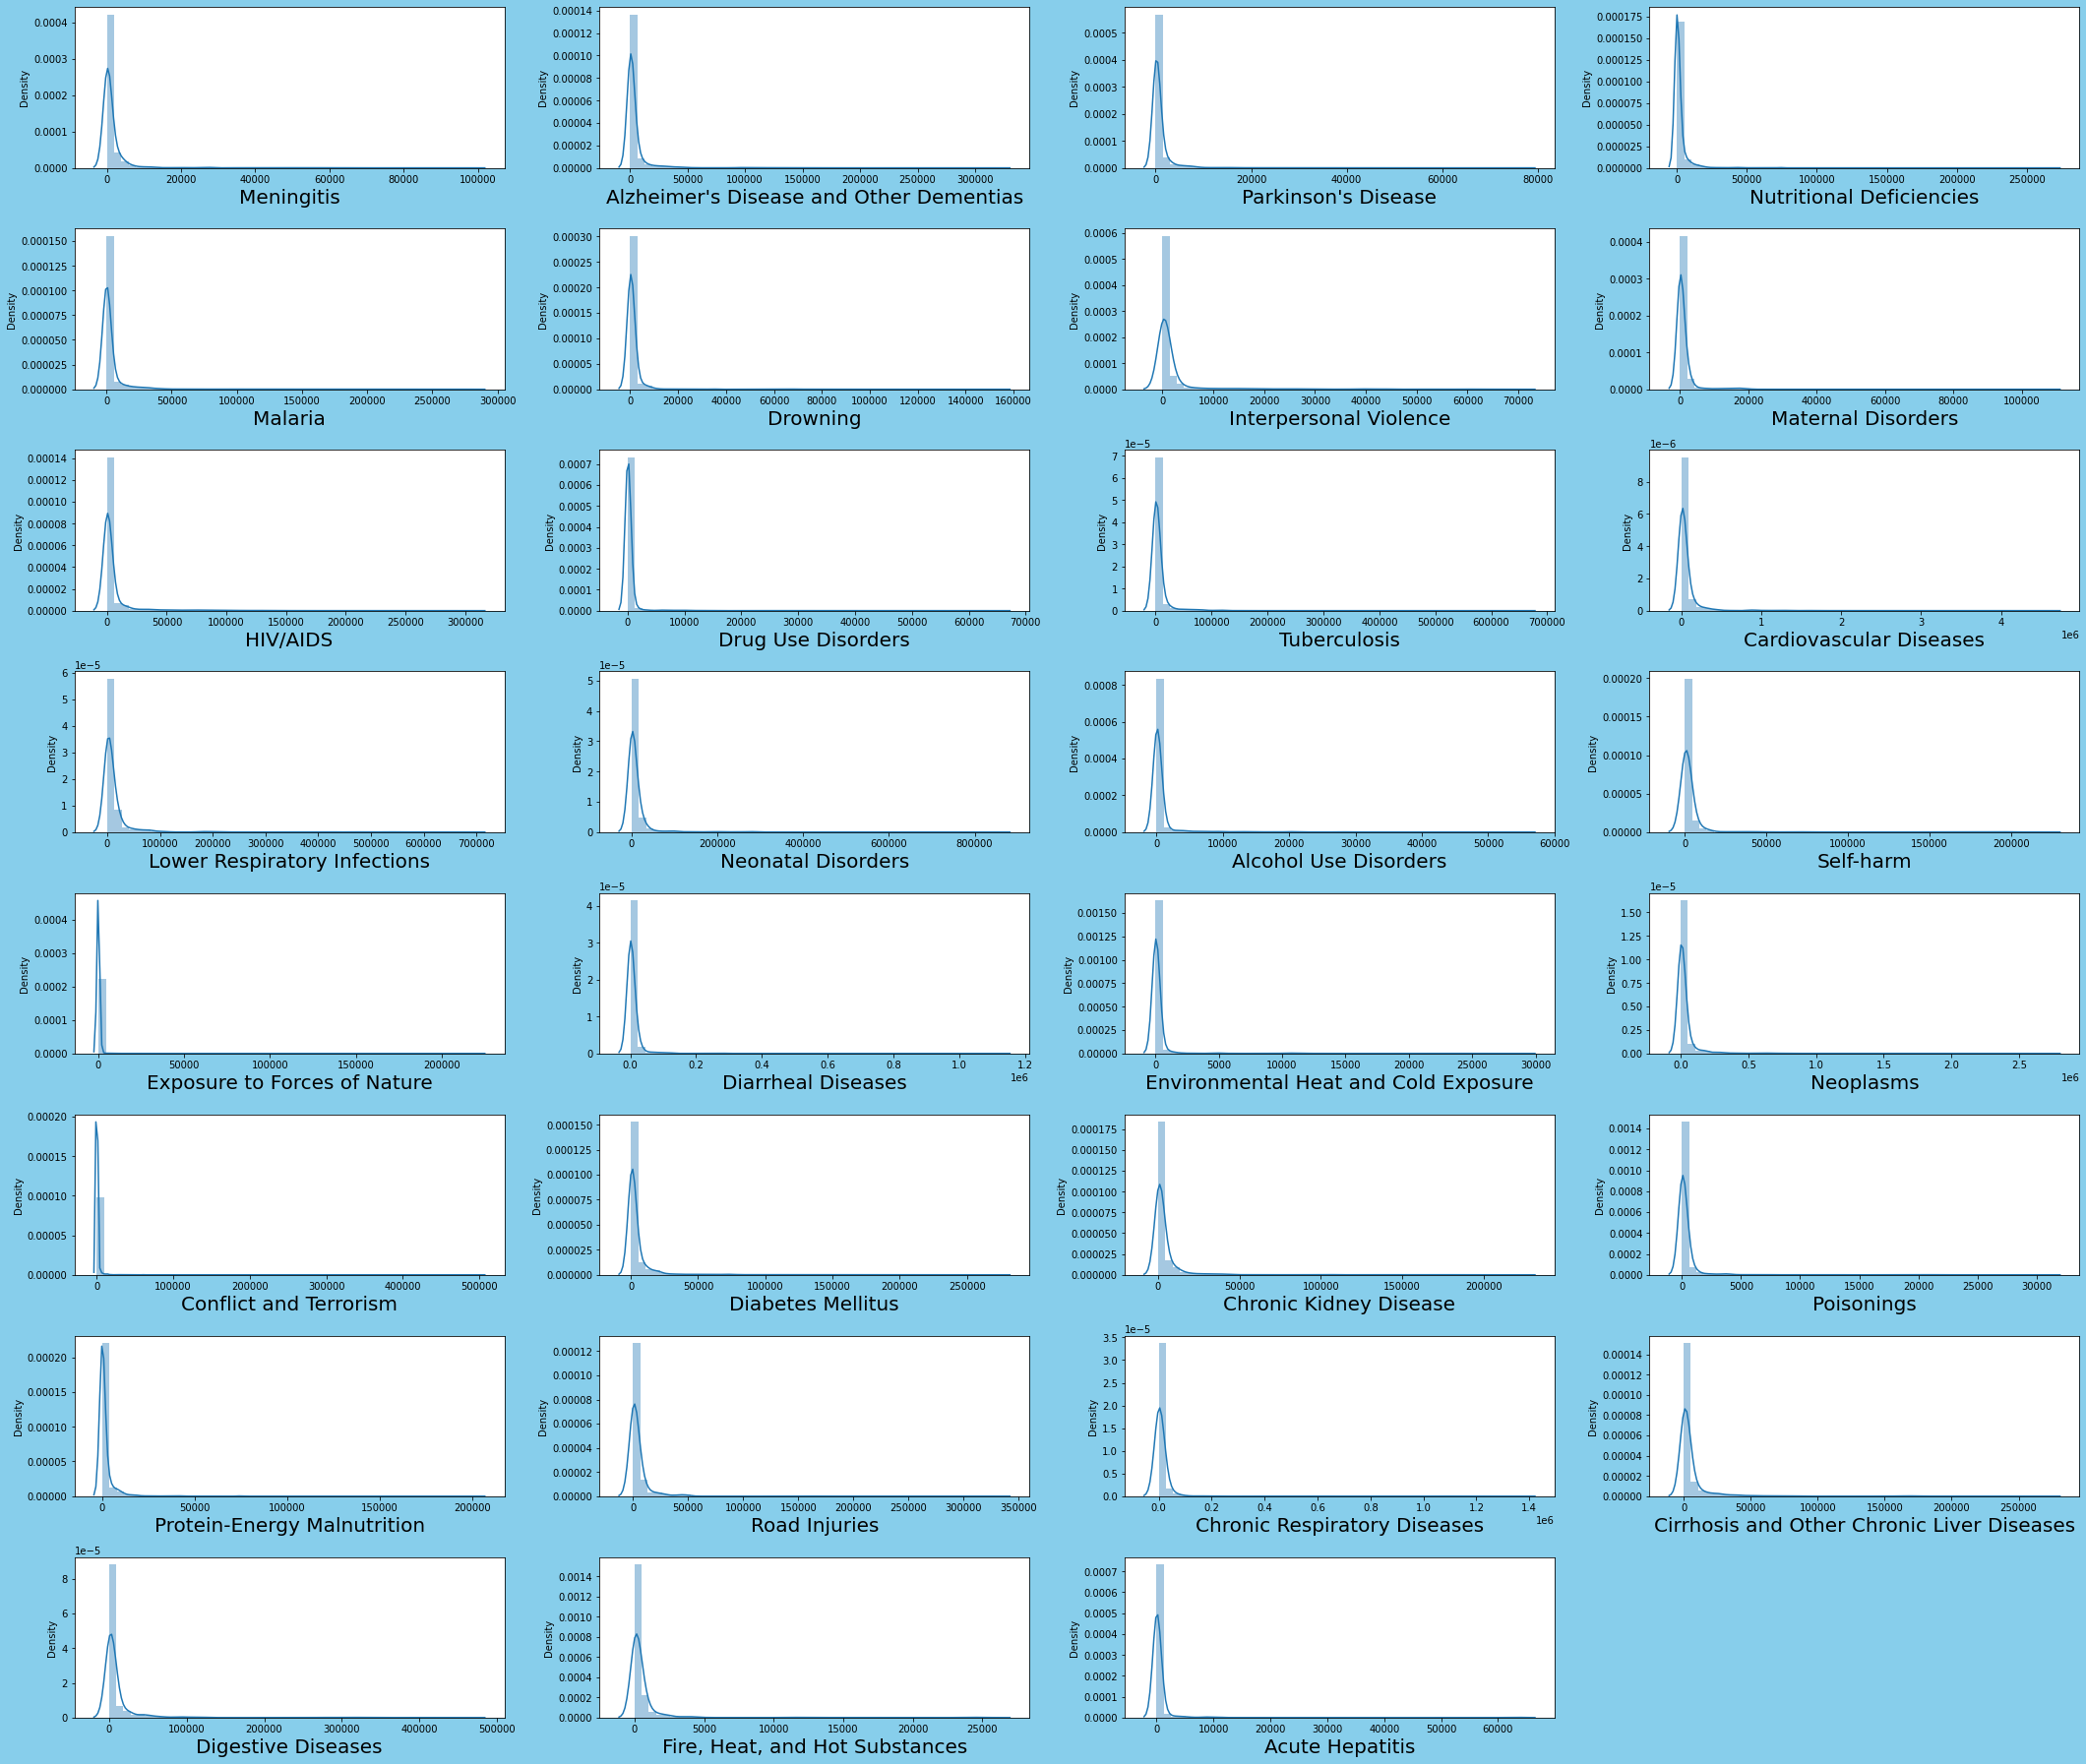

In [73]:
 #lets see how data is distributed for every column
pylt.figure(figsize = (30,25), facecolor ='skyblue')
plotnumber = 1

for column in x:
  if plotnumber<=32:
    ax = pylt.subplot(8,4,plotnumber)
    sns.distplot(x[column])
    pylt.xlabel(column,fontsize = 20)
  plotnumber+=1
pylt.tight_layout()

 i ploted only the disease columns 

lets remove the year too because year here it seems to be number but behavior is like category

In [74]:
x.head()

,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,2159,1116,371,2087,93,1370,1538,2655,34,93,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,2218,1136,374,2153,189,1391,2001,2885,41,102,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,2475,1162,378,2441,239,1514,2299,3315,48,118,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,2812,1187,384,2837,108,1687,2589,3671,56,132,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,3027,1211,391,3081,211,1809,2849,3863,63,142,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


Now lets perform unsuperwised meachine learning technique here

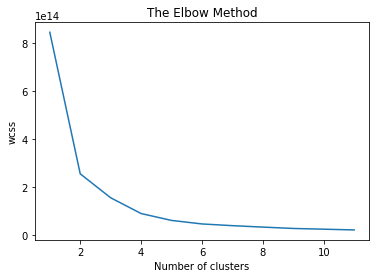

In [76]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,12):
  kmeans = KMeans(n_clusters=i,random_state = 42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
pylt.plot(range(1,12),wcss)
pylt.title('The Elbow Method')
pylt.xlabel('Number of clusters')
pylt.ylabel('wcss')
pylt.show()

In [77]:
# fitting K-mean to the dataset
kmeans = KMeans(n_clusters = 5,random_state = 420)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[2 2 2 ... 2 2 2]


Total number of cluster are here 5

In [78]:
# Model Evaluation
# just like in supervised learning we have a unsupervised learning as well
from sklearn.metrics import silhouette_score

In [79]:
silhouette_score(x,y_kmeans)

0.7930635535847472

In [80]:
# sample prediction
x.head(1) 

,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,2159,1116,371,2087,93,1370,1538,2655,34,93,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985


In [81]:
cluster_4_x = x[y_kmeans == 4]
print(cluster_4_x)

      Meningitis  Alzheimer's Disease and Other Dementias  \
4470        2255                                    23706   
4471        2199                                    24804   
4472        2253                                    25388   
4473        2564                                    26077   
4474        2803                                    26677   
4475        2689                                    26650   
4476        2387                                    26918   
4477        2203                                    26786   
4478        2112                                    26820   
4479        2230                                    27413   
4480        2315                                    27403   
4481        2362                                    27427   
4482        2380                                    27337   
4483        2402                                    27435   
4484        2310                                    28328   
4485        2337        

In [83]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Meningitis                                  6120 non-null   int64
 1   Alzheimer's Disease and Other Dementias     6120 non-null   int64
 2   Parkinson's Disease                         6120 non-null   int64
 3   Nutritional Deficiencies                    6120 non-null   int64
 4   Malaria                                     6120 non-null   int64
 5   Drowning                                    6120 non-null   int64
 6   Interpersonal Violence                      6120 non-null   int64
 7   Maternal Disorders                          6120 non-null   int64
 8   HIV/AIDS                                    6120 non-null   int64
 9   Drug Use Disorders                          6120 non-null   int64
 10  Tuberculosis                        